In [1]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 9.9 MB/s 
     |████████████████████████████████| 900 kB 37.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# Import dependecies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Import data

data = pd.read_csv('unordered_demographics.csv')

# Identify column of interest and rename it

column = ['Where is your hometown located?']
relevant_data = data[column].dropna().rename(columns={'Where is your hometown located?': 'hometown'})

In [3]:
# Generate distribution

relevant_data['Number of Respondents'] = relevant_data.groupby(['hometown'])['hometown'].transform('count')
relevant_data['Number of Respondents']= relevant_data['Number of Respondents']/90*100
relevant_data

,hometown,Number of Respondents
0,Alberta,1.111111
1,Another province in Canada,1.111111
2,British Columbia,7.777778
3,British Columbia,7.777778
4,British Columbia,7.777778
...,...,...
85,Ontario outside of GTA and KW,15.555556
86,USA,4.444444
87,USA,4.444444
88,USA,4.444444


<Figure size 432x288 with 0 Axes>

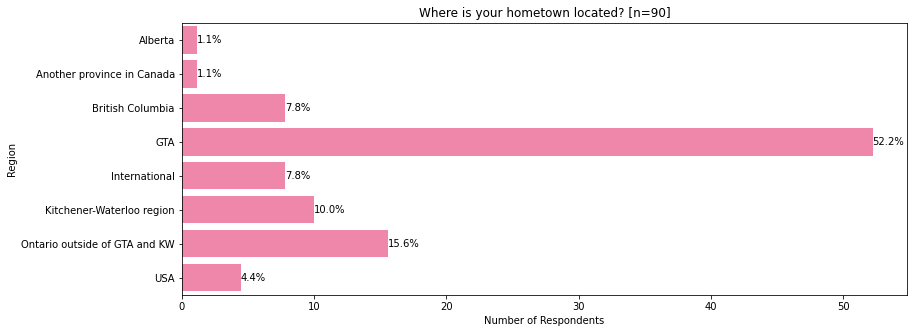

In [4]:
# Plot graph with appropriate title, color palette, and data

plt.figure()
fig, ax = plt.subplots(figsize=(13, 5))    
plt.title("Where is your hometown located? [n=90]")
ax = sns.barplot(y=relevant_data["hometown"], x=relevant_data["Number of Respondents"], data=relevant_data, color='#FF76A5')
plt.xlabel("Number of Respondents")
plt.ylabel("Region")
plt.bar_label(ax.containers[0], fmt='%.1f%%')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))